# Pymaceuticals Inc.
---

### Analysis

Total 248 mice are taken for anlaysis.Out of which 51% are male and 49% are Female.(MouseID ="g989" is dropped due to duplicate data).

The Drugs Campomulin,Ramicane have higher observed Mouse TimePoints.These two drugs are most used.

The Drug infubinol,Propriva have lower observed  Mouse Time Points. These two drugs are least used.

While taking (Capomulin, Ramicane, Infubinol, and Ceftamin),Infubinol has Potential Outliers

On treatment with  Drug (Campomulin) Tumor Volume decreased with Timepoint.

Tumor Volume increased with increase in Mouse Weight.

The correlation between mouse weight and average tumor volume  is 0.84.This signifies Positive correlation.

The r-squared is: 0.709.This signifies that both the factors(mouse weight and average tumor volume) are strongly dependent.





 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress



In [3]:

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study=pd.merge(mouse_metadata,study_results, on="Mouse ID", how="right")

# Display the data table for preview

mouse_study=mouse_study[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites",
                         "Drug Regimen","Sex","Age_months","Weight (g)"]]
mouse_study.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mouse_count=len(mouse_study["Mouse ID"].unique())
mouse_count


249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup=mouse_study[mouse_study[["Mouse ID","Timepoint"]].duplicated(keep=False)]
dup_ID=dup["Mouse ID"].unique()
dup_ID



array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data=mouse_study.loc[mouse_study["Mouse ID"]==dup_ID[0]]
dup_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=mouse_study.loc[mouse_study["Mouse ID"]!= dup_ID[0]]
clean_df.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df_mc=len(clean_df["Mouse ID"].unique())
clean_df_mc

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Tumor_mean=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Tumor_median=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Tumor_variance=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Tumor_stddev=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Tumor_sem=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

statistics_tb=pd.DataFrame({  "Tumor Volume Mean":Tumor_mean,
                            " Tumor Volume Median":Tumor_median,
                            "Tumor Volume Variance":Tumor_variance,
                            "Tumor Volume Std. Dev":Tumor_stddev,
                            "Tumor Volume Std. Err":Tumor_sem})


statistics_tb


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

statistics_adv=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])


statistics_adv = statistics_adv.rename(columns={"mean": " Tumor Volume Mean",
                                                  "median": " Tumor Volume Median",
                                                   "var": " Tumor Volume Variance",
                                                   "std":" Tumor Volume Std. Dev", 
                                                   "sem":"Tumor Volume Std.Err "})
statistics_adv

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

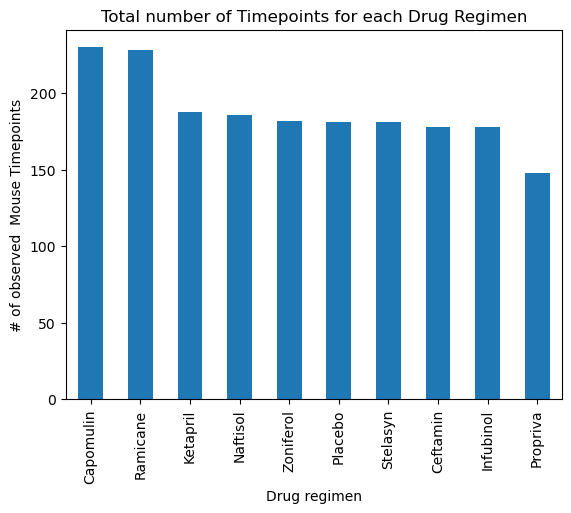

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_df=clean_df.groupby("Drug Regimen")["Timepoint"].count()
bar_df =bar_df.sort_values(ascending=False)

bar_df.plot(kind="bar",rot=90)
plt.title("Total number of Timepoints for each Drug Regimen")
plt.xlabel("Drug regimen")
plt.ylabel("# of observed  Mouse Timepoints")
plt.show()

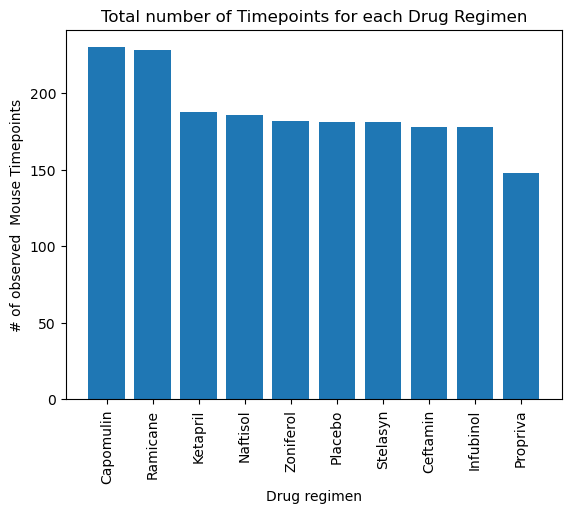

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_df=clean_df.groupby("Drug Regimen")["Timepoint"].count()
bar_df =bar_df.sort_values(ascending=False)
plt.bar(bar_df.index,bar_df.values)
plt.title("Total number of Timepoints for each Drug Regimen")
plt.xlabel("Drug regimen")
plt.ylabel("# of observed  Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()



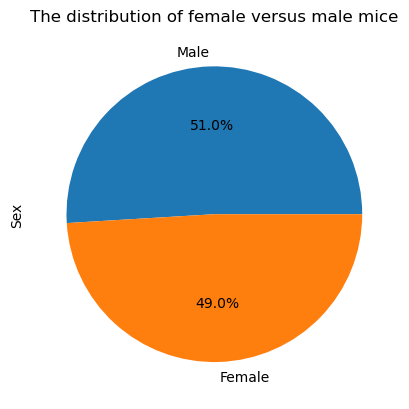

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_df =clean_df["Sex"].value_counts()
pie_df.plot(kind="pie",label="Sex",autopct="%1.1f%%")
plt.title("The distribution of female versus male mice")
plt.show()




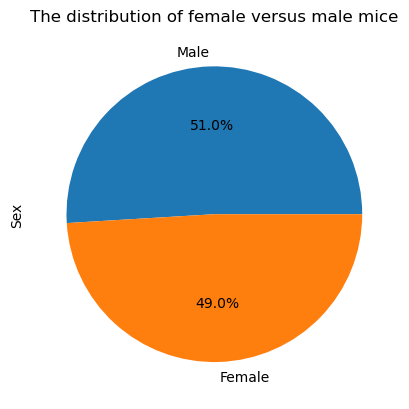

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_df =clean_df["Sex"].value_counts()
plt.pie(pie_df.values, labels=pie_df.index,autopct="%1.1f%%")
plt.title("The distribution of female versus male mice")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mousegrp_df=clean_df.groupby("Mouse ID")["Timepoint"].max()
mousegrp_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
boxplt_df=pd.merge(mousegrp_df,clean_df ,on=["Mouse ID","Timepoint"], how="inner",left_index=False,right_index=False)
boxplt_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol_drug=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
  
# Determine outliers using upper and lower bounds

for drug in treatments:
    tumorvol= boxplt_df.loc[boxplt_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumorvol_drug.append( tumorvol)
    quartiles = tumorvol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

#     print(f"The lower quartile  is: {lowerq}")
#     print(f"The upper quartile  is: {upperq}")
#     print(f"The interquartile   is: {iqr}")
#     print(f"The the median  is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   
    #print(f"Values below {lower_bound} could be outliers.")
    #print(f"Values above {upper_bound} could be outliers.")
    
    outliers = tumorvol[(tumorvol < lower_bound) | (tumorvol >upper_bound)]
    print(f"{drug}'s Potential Outliers {outliers}")


            
    


    
   
   
    
    


Capomulin's Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential Outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


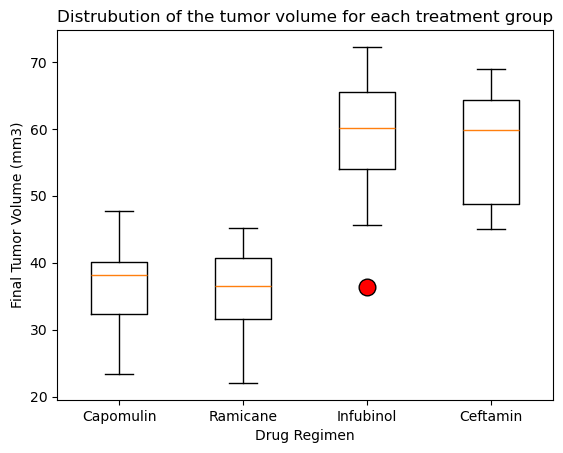

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
flierprops=flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  markeredgecolor='black')
ax.boxplot(tumorvol_drug,flierprops=flierprops)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_title("Distrubution of the tumor volume for each treatment group")
ax.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

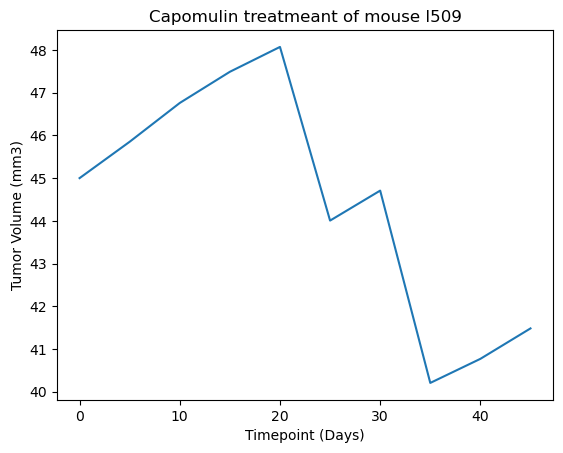

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df=clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin") & (clean_df["Mouse ID"]=="l509" )]
timepoint=line_df["Timepoint"]
tumorvolume=line_df["Tumor Volume (mm3)"]
plt.plot(timepoint,tumorvolume)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatmeant of mouse l509")
plt.show()



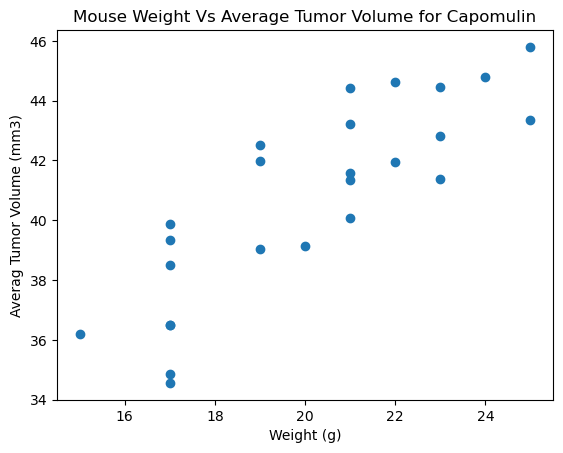

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_df=clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")]
avg_tumorvol=scatter_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight=scatter_df.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(weight,avg_tumorvol)
plt.title("Mouse Weight Vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")
plt.show()        

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient  
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correl=st.pearsonr(weight,avg_tumorvol)
corcoeff=round(correl[0],2)
print(f"The correlation between mouse weight and average tumor volume  is {corcoeff}")



The correlation between mouse weight and average tumor volume  is 0.84


The r-squared is: 0.709


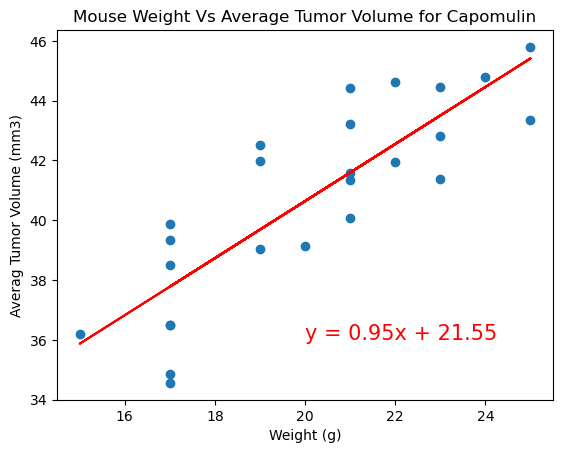

In [21]:

#calculate linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values=weight
y_values=avg_tumorvol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color="red")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Mouse Weight Vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()
 